<a href="https://colab.research.google.com/github/kusumikakd/Data_Analysis-by-python/blob/master/Brain_Tumor_Classification_from_MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#For reading Image files
import cv2
from PIL import Image

# to read from directory
import os
from os import listdir

In [ ]:
from random import shuffle
from collections import Counter

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [ ]:
os.listdir('/content/drive/My Drive/brain_tumor_dataset-20200604T045108Z-001')

['yes', 'no']

In [ ]:
no_image=Image.open('/content/drive/My Drive/brain_tumor_dataset-20200604T045108Z-001/no/1 no.jpeg')
yes_image = Image.open('/content/drive/My Drive/brain_tumor_dataset-20200604T045108Z-001/yes/Y1.jpg')

Text(0.5, 1.0, 'Brain Tumor MRI')

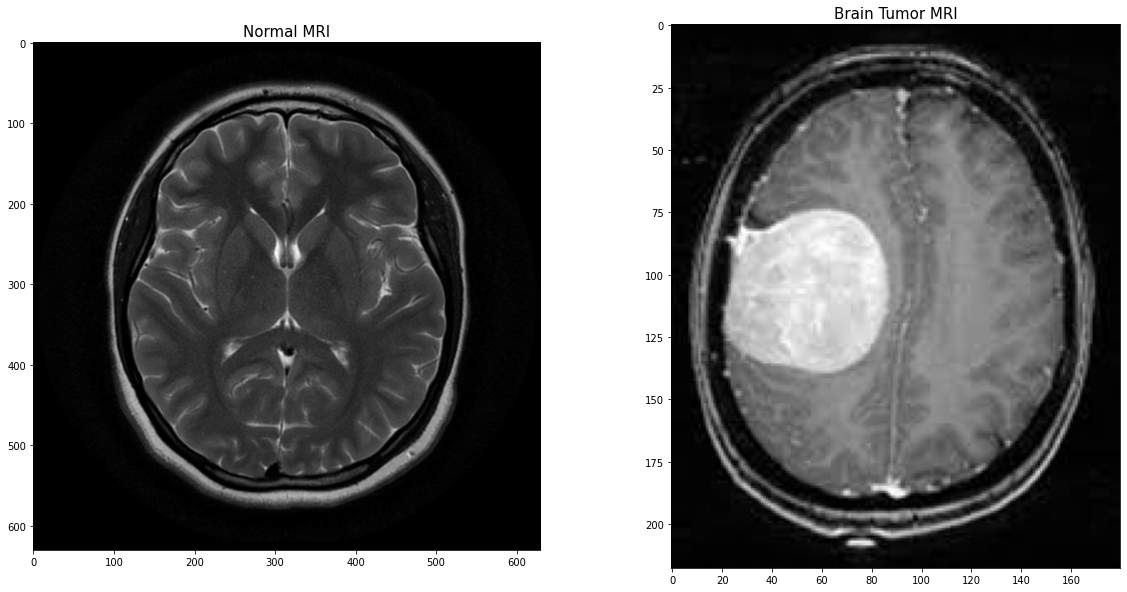

In [ ]:
# Let's plot these images 
#Let's plot these x-ray images
fig = plt.figure(figsize=(20,10))
# 1,2,1 ==> 1 row, 2 columns, 1st Image
a1 = fig.add_subplot(1, 2, 1) 
img_plot = plt.imshow(no_image , cmap= 'gray')
a1.set_title ('Normal MRI', fontsize = 15)

# 1,2,2 ==> 1 row, 2 columns, 2nd Image
a1 = fig.add_subplot(1, 2, 2)
img_plot = plt.imshow(yes_image , cmap= 'gray')
a1.set_title ('Brain Tumor MRI', fontsize = 15)



In [ ]:
yes=os.listdir('/content/drive/My Drive/brain_tumor_dataset-20200604T045108Z-001/yes')
no= os.listdir('/content/drive/My Drive/brain_tumor_dataset-20200604T045108Z-001/no')

In [ ]:
data=np.concatenate([yes, no])

In [ ]:
target_x=np.full(len(yes),1)
target_y = np.full(len(no), 0)
target_x

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [ ]:
data_target=np.concatenate([target_x, target_y])

In [ ]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
x_data=[]
for file in yes:
  img= cv2.imread('/content/drive/My Drive/brain_tumor_dataset-20200604T045108Z-001/yes/'+file)
  mri= cv2.resize(img, (32,32))
  (b, g, r)= cv2.split(mri)
  img=cv2.merge([r,g,b])
  x_data.append(img)


In [ ]:
img= cv2.imread('/content/drive/My Drive/brain_tumor_dataset-20200604T045108Z-001/yes/Y1.jpg')

In [ ]:
img

array([[[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       ...,

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [3, 3, 3],
        [3, 3, 3]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [2, 2, 2]]], dtype=uint8)

In [ ]:

for file in no:
  img= cv2.imread('/content/drive/My Drive/brain_tumor_dataset-20200604T045108Z-001/no/'+file)
  mri= cv2.resize(img, (32,32))
  (b, g, r)= cv2.split(mri)
  img=cv2.merge([r,g,b])
  x_data.append(img)

In [ ]:
X= np.squeeze(x_data)

In [ ]:
X.shape

(253, 32, 32, 3)

In [ ]:
X=X.astype('float32')
X/=255

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, data_target, test_size=0.1, random_state = 1)

In [ ]:
x_train.shape

(227, 32, 32, 3)

In [ ]:
x_train2, x_val, y_train2, y_val =train_test_split(X, data_target, test_size=0.25, random_state = 1)

In [ ]:
x_train2.shape

(189, 32, 32, 3)

In [ ]:
def build_model():
  # Input Layer
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size=9, activation='relu', padding='same', input_shape = (32, 32, 3)))
  model.add(MaxPooling2D(pool_size=(2)))
  model.add(Dropout(0.45))

  # ConvNets - II
  model.add(Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.25))
  
  # ConvNets - III
  model.add(Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.25))
  
  # Faltten Matrix
  model.add(Flatten())

  # FC Layer 
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.15))
  # Output Layer
  model.add(Dense(1, activation='sigmoid'))
  # Take a look at the model summary
  
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model 
  

In [ ]:
model = build_model()

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        3904      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        20752     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 36)         

In [ ]:
history = model.fit(x_train2,
         y_train2,
         batch_size=128,
         epochs=150,
         validation_data=(x_val, y_val))




Train on 189 samples, validate on 64 samples
Epoch 1/150
189/189 [==============================] - 6s 34ms/step - loss: 0.6515 - accuracy: 0.5926 - val_loss: 0.6783 - val_accuracy: 0.5469
Epoch 2/150
189/189 [==============================] - 0s 200us/step - loss: 0.6399 - accuracy: 0.6349 - val_loss: 0.6779 - val_accuracy: 0.5469
Epoch 3/150
189/189 [==============================] - 0s 190us/step - loss: 0.6480 - accuracy: 0.6349 - val_loss: 0.6689 - val_accuracy: 0.5469
Epoch 4/150
189/189 [==============================] - 0s 193us/step - loss: 0.6315 - accuracy: 0.6349 - val_loss: 0.6640 - val_accuracy: 0.5469
Epoch 5/150
189/189 [==============================] - 0s 189us/step - loss: 0.6397 - accuracy: 0.6349 - val_loss: 0.6516 - val_accuracy: 0.5469
Epoch 6/150
189/189 [==============================] - 0s 195us/step - loss: 0.6213 - accuracy: 0.6349 - val_loss: 0.6498 - val_accuracy: 0.5469
Epoch 7/150
189/189 [==============================] - 0s 222us/step - loss: 0.6191 - 

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
score= model.evaluate(x_test, y_test)

In [ ]:
score[1]

In [ ]:
prediction= model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
predictions = np.round(prediction) 
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_test, predictions) 
confusion_mtx

In [ ]:
labels =["Yes","No"]

y_hat = model.predict(x_test)

In [ ]:

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()